In [233]:
#Importing All Required Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings(action='ignore')

In [234]:
#Loading Dataset
pd.set_option('display.max_columns',10,'display.width',1000)
df_test = pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')

In [235]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,...,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,...,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,...,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,...,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,...,1,3101298,12.2875,NaN,S


In [236]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [237]:
#Display shape for test
df_test.shape


(418, 12)

In [238]:
#Display shape for train
df_train.shape

(891, 12)

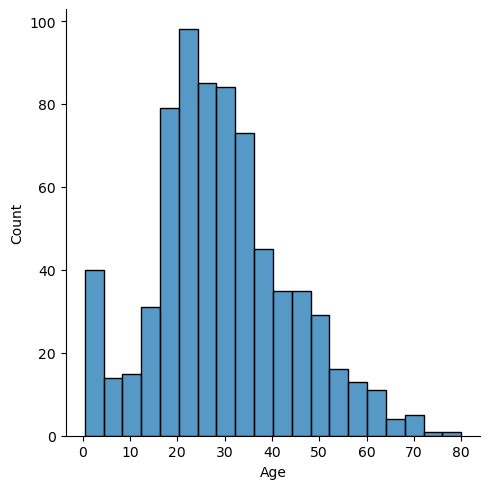

In [121]:
sns.displot(df_train['Age'])

In [123]:
# Now Description of dataset
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [124]:
df_test.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,...,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,...,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.500000,NaN,NaN


In [125]:
# Correlation
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [126]:
df_test.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [127]:
# Number of Males in Titanic
males_no=len(df_train[df_train['Sex'] == 'male'])
print("No of Males in Titanic:",males_no)


No of Males in Titanic: 577


In [128]:
# Number of Females in Titanic
females_no=len(df_train[df_train['Sex'] == 'female'])
print("No of Females in Titanic:",females_no)


No of Females in Titanic: 314


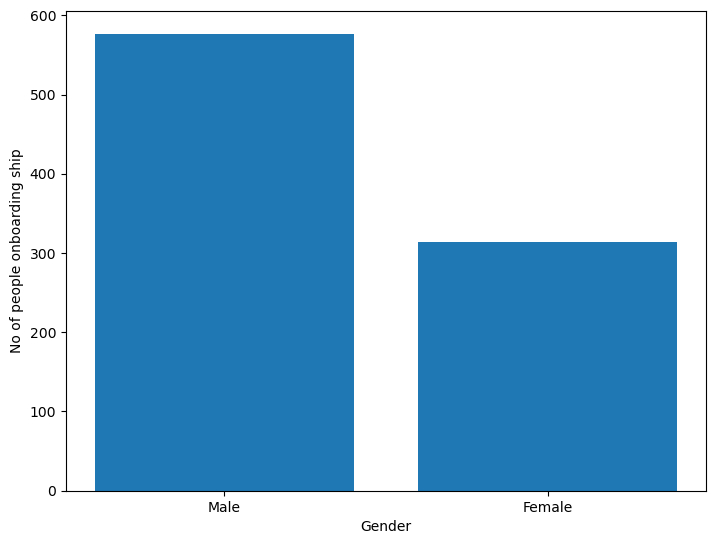

In [129]:
#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [130]:
Alive = len(df_train[df_train['Survived'] == 1])
Dead = len(df_train[df_train['Survived'] == 0])

In [131]:
df_train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

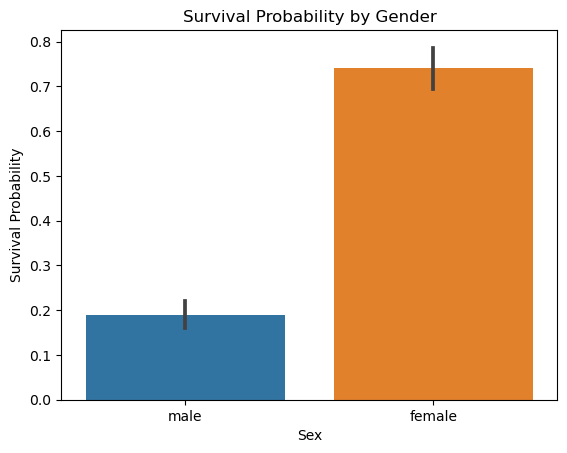

In [132]:

sns.barplot(x = 'Sex', y ='Survived', data =df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Female passengers are more likely to survive


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

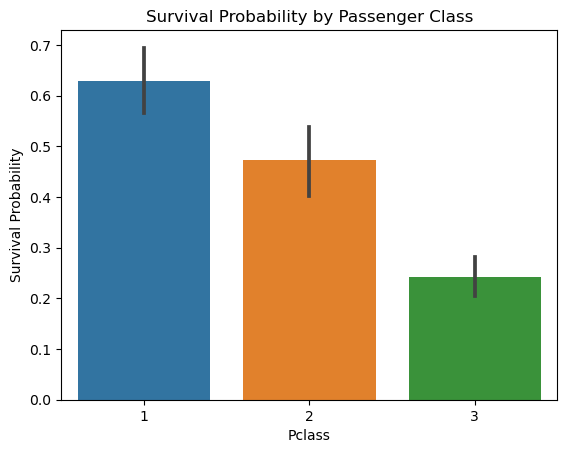

In [133]:
sns.barplot(x = 'Pclass', y ='Survived', data =df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Survival probability decrease with passenger class

([<matplotlib.axis.XTick at 0x2189bd66710>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

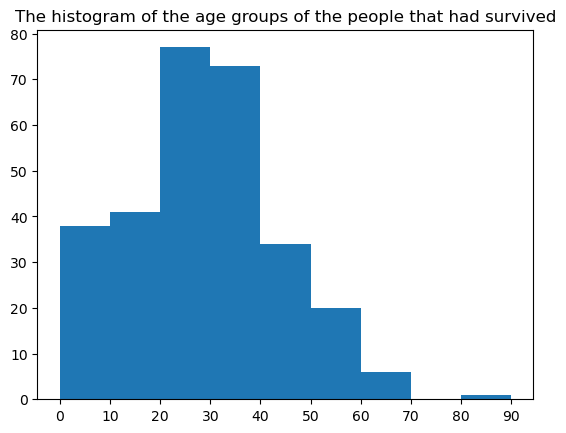

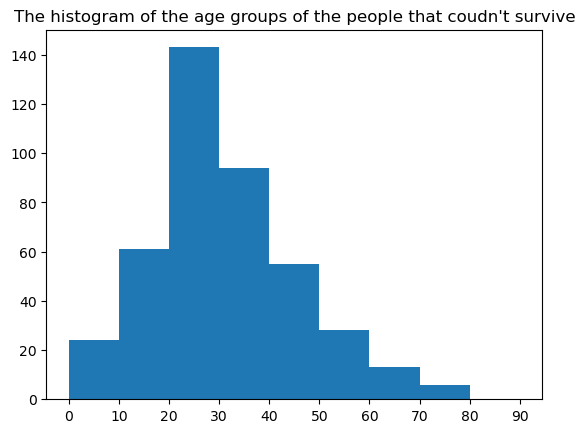

In [134]:
plt.figure(1)
age  = df_train.loc[df_train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = df_train.loc[df_train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [135]:
# Value counts of the Embarked column 

df_train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [136]:
df_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [137]:
df_train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [138]:
df_train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

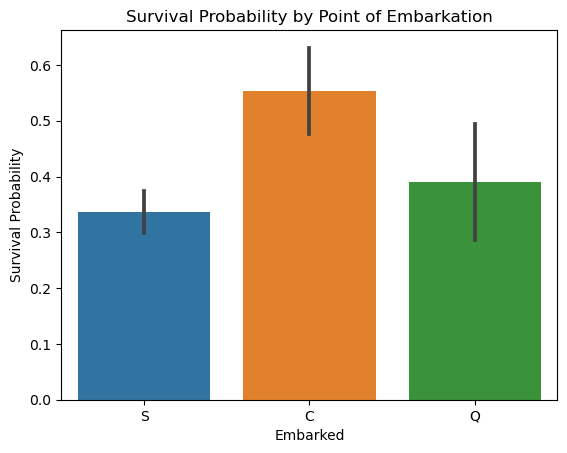

In [139]:
sns.barplot(x = 'Embarked', y ='Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')
# Survival probability is highest for location C and lowest for location S.


In [140]:
from collections import Counter

In [141]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(df_train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [142]:
# Outliers in numerical variables

df_train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,...,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,...,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,...,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,...,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,...,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,...,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,...,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,...,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,...,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,...,2,CA. 2343,69.55,NaN,S


<Axes: >

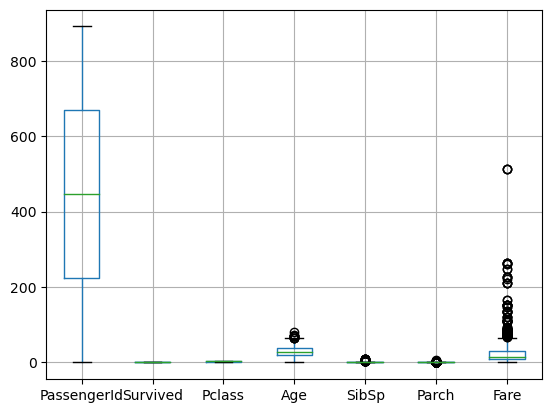

In [143]:
df_train.boxplot()

In [144]:
# Drop outliers and reset index

print("Before: {} rows".format(len(df_train)))
df_train = df_train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(df_train)))

Before: 891 rows
After: 881 rows


# correlation with survival

<Axes: >

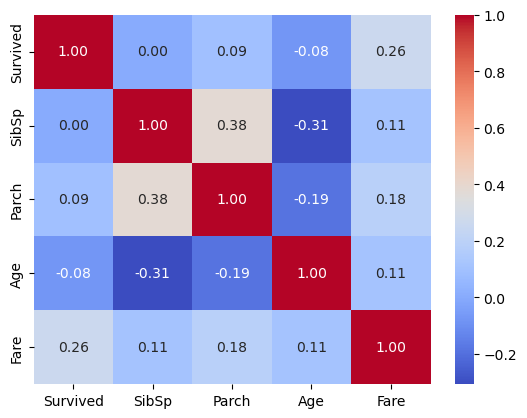

In [145]:
sns.heatmap(df_train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

In [146]:
# Value counts of the SibSp column 

df_train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [147]:
# Mean of survival by SibSp

df_train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

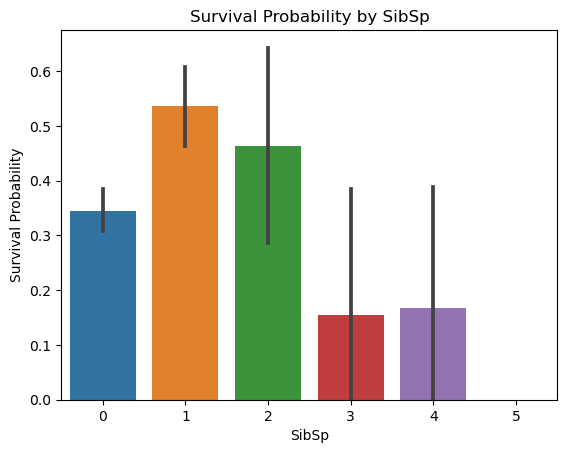

In [148]:
sns.barplot(x = 'SibSp', y ='Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [149]:
# Value counts of the Parch column 

df_train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Parch')

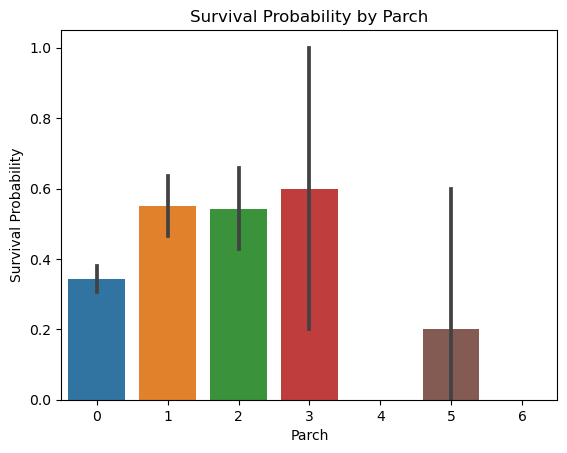

In [150]:
sns.barplot(x = 'Parch', y ='Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [151]:
df_train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

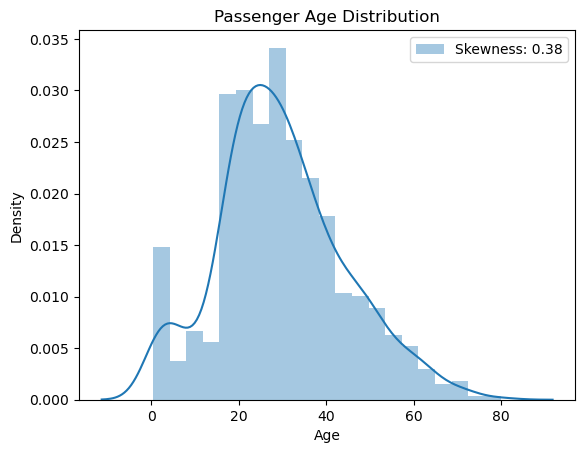

In [152]:
# Passenger age distribution

sns.distplot(df_train['Age'], label = 'Skewness: %.2f'%(df_train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

In [153]:
# Null values of Fare column 

df_train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

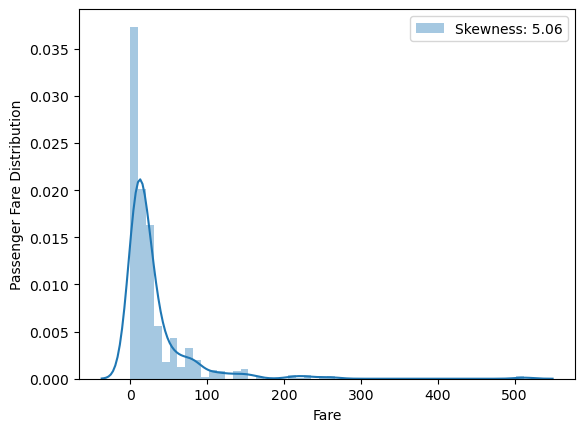

In [154]:
# Passenger fare distribution

sns.distplot(df_train['Fare'], label = 'Skewness: %.2f'%(df_train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [155]:
# 5. Data preprocessing

 #Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

#- Drop and fill missing values
#- Data trasformation (log transformation)
#- Feature engineering
#- Feature encoding

In [156]:
# Drop ticket and cabin features from training and test set

df_train = df_train.drop(['Ticket', 'Cabin'], axis = 1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis = 1)

In [157]:
# Let us check missing values in training set 

df_train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

<Axes: >

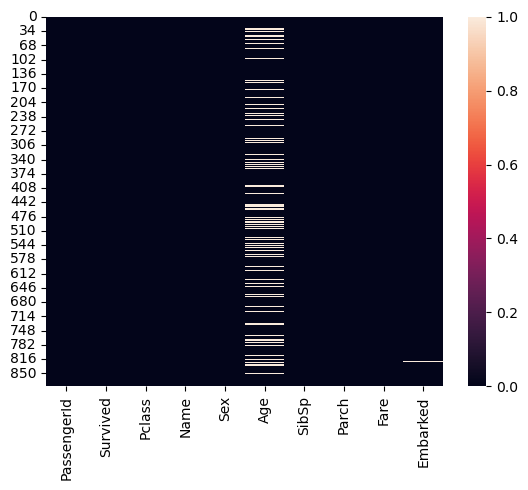

In [158]:
sns.heatmap(df_train.isnull())
# We can see missing values in Age and Embarked Column

In [159]:
# Compute the most frequent value of Embarked in training set

mode = df_train['Embarked'].dropna().mode()[0]

In [160]:
mode

'S'

In [161]:
# Fill missing value in Embarked with mode

df_train['Embarked'].fillna(mode, inplace = True)

In [162]:
# Let us check missing values in test set

df_test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

<Axes: >

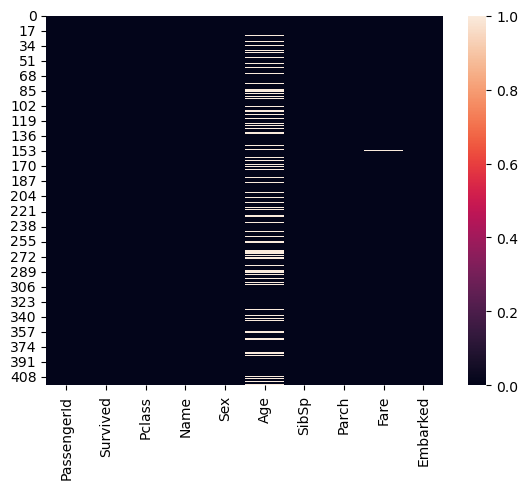

In [163]:
sns.heatmap(df_test.isnull())

In [164]:
# We can compute median of Fare in test set 

median = df_test['Fare'].dropna().median()

In [165]:
median

14.4542

In [166]:
# Now Fill missing value in Fare with median

df_test['Fare'].fillna(median, inplace = True)

In [167]:
# Combine training set and test set

combine = pd.concat([df_train, df_test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [168]:
#Now check missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Age            256
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [169]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

<Axes: >

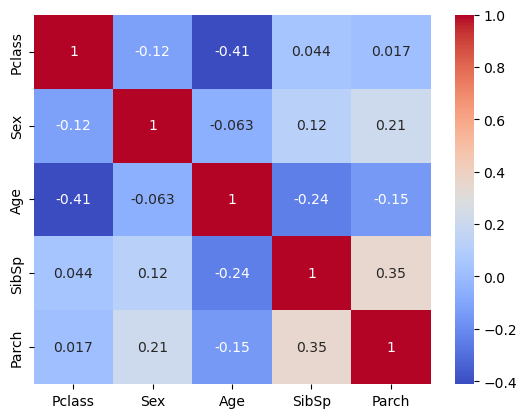

In [170]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [171]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

In [172]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [173]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

# Data tranformation

Text(0.5, 1.0, 'Passenger Fare Distribution')

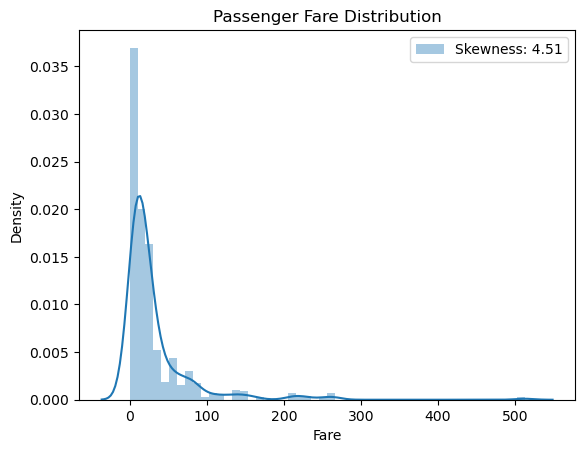

In [174]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [175]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

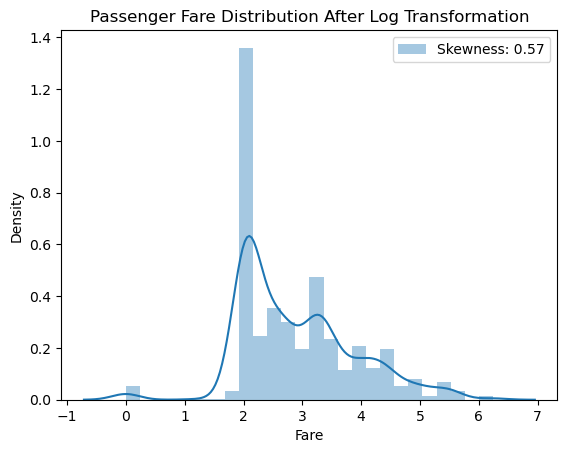

In [176]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

# Now move to feature Engineering

In [177]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [178]:
combine.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1294,1305,0,3,"Spector, Mr. Woolf",0,25.0,0,0,2.085672,S
1295,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,4.690430,C
1296,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,1.981001,S
1297,1308,0,3,"Ware, Mr. Frederick",0,25.0,0,0,2.085672,S
1298,1309,0,3,"Peter, Master. Michael J",0,16.0,1,1,3.107198,C


In [179]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [180]:
# Number of unique Title

combine['Title'].nunique()

18

In [181]:
combine.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.021161,-0.041372,-0.013353,0.018547,-0.035835,0.019635,0.030612
Survived,-0.021161,1.000000,-0.261112,0.691201,-0.032026,0.034831,0.116102,0.303341
Pclass,-0.041372,-0.261112,1.000000,-0.124138,-0.448908,0.044041,0.016823,-0.703270
Sex,-0.013353,0.691201,-0.124138,1.000000,-0.057042,0.119559,0.212624,0.250729
Age,0.018547,-0.032026,-0.448908,-0.057042,1.000000,-0.238608,-0.134905,0.216972
SibSp,-0.035835,0.034831,0.044041,0.119559,-0.238608,1.000000,0.350474,0.300736
Parch,0.019635,0.116102,0.016823,0.212624,-0.134905,0.350474,1.000000,0.310633
Fare,0.030612,0.303341,-0.703270,0.250729,0.216972,0.300736,0.310633,1.000000


In [182]:
# Value counts of Title

combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [183]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

In [184]:
combine['Title'].value_counts()

Mr        753
Miss      259
Mrs       198
Master     60
Rare       29
Name: Title, dtype: int64

In [185]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.868687
1,Miss,0.799228
0,Master,0.383333
4,Rare,0.310345
2,Mr,0.107570


Text(0.5, 1.0, 'Mean of survival by Title')

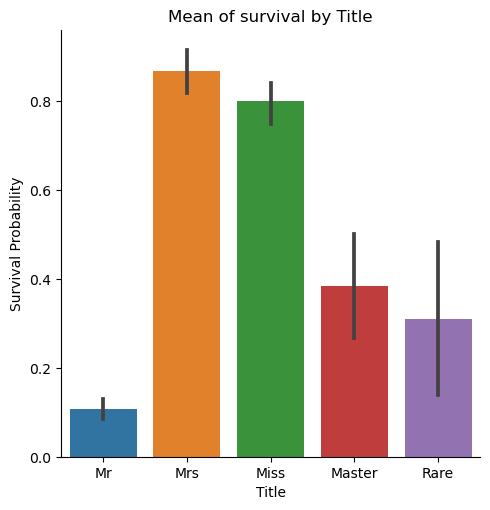

In [186]:
sns.catplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [187]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1,3,1,26.0,0,0,2.070022,S,Miss
3,4,1,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0,3,0,35.0,0,0,2.085672,S,Mr


In [188]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(20)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [189]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.720930
2,3,0.559748
1,2,0.531915
8,11,0.500000
6,7,0.312500
0,1,0.292405
4,5,0.227273
5,6,0.136364
7,8,0.125000


In [190]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [191]:
combine['IsAlone'].head()

0    0
1    0
2    1
3    0
4    1
Name: IsAlone, dtype: int64

In [192]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.512770
1,1,0.292405


In [193]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,1.981001,S,Mr,0
1,2,1,1,1,38.0,4.266662,C,Mrs,0
2,3,1,3,1,26.0,2.070022,S,Miss,1
3,4,1,1,1,35.0,3.972177,S,Mrs,0
4,5,0,3,0,35.0,2.085672,S,Mr,1


In [194]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.506757
1,"(16.136, 32.102]",0.341160
2,"(32.102, 48.068]",0.399351
3,"(48.068, 64.034]",0.424528
4,"(64.034, 80.0]",0.153846


In [195]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [196]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [197]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [198]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [199]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


# Now Feature Encoding

In [200]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,0,1,1.981001,S,Mr,0,3
1,2,1,1,1,2,4.266662,C,Mrs,0,2
2,3,1,3,1,1,2.070022,S,Miss,1,3
3,4,1,1,1,2,3.972177,S,Mrs,0,2
4,5,0,3,0,2,2.085672,S,Mr,1,6


In [201]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,...,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,...,0,0,0,0,1
1,2,1,1,1,2,...,1,0,1,0,0
2,3,1,3,1,1,...,0,0,0,0,1
3,4,1,1,1,2,...,1,0,0,0,1
4,5,0,3,0,2,...,0,0,0,0,1


In [202]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [203]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.003, 0.75]",0.052632
1,"(0.75, 1.5]",0.293059
2,"(1.5, 2.25]",0.492925
3,"(2.25, 3.0]",0.692308


In [204]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [205]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [206]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,...,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,...,0,0,0,0,1
1,2,1,1,1,2,...,1,0,1,0,0
2,3,1,3,1,1,...,0,0,0,0,1
3,4,1,1,1,2,...,1,0,0,0,1
4,5,0,3,0,2,...,0,0,0,0,1


In [207]:
# Separate training and test set from the combined dataframe

df_train = combine[:len(df_train)]
df_test = combine[len(df_train):]

In [208]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,...,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,...,0,0,0,0,1
1,2,1,1,1,2,...,1,0,1,0,0
2,3,1,3,1,1,...,0,0,0,0,1
3,4,1,1,1,2,...,1,0,0,0,1
4,5,0,3,0,2,...,0,0,0,0,1


In [209]:
# Drop passenger ID column from and training set

df_train = df_train.drop('PassengerId', axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,...,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,...,0,0,0,0,1
1,1,1,1,2,2,...,1,0,1,0,0
2,1,3,1,1,1,...,0,0,0,0,1
3,1,1,1,2,2,...,1,0,0,0,1
4,0,3,0,2,1,...,0,0,0,0,1


In [210]:
# Convert survived back to integer in the training set

df_train['Survived'] = df_train['Survived'].astype('int')
df_train.head()

,Survived,Pclass,Sex,Age,Fare,...,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,...,0,0,0,0,1
1,1,1,1,2,2,...,1,0,1,0,0
2,1,3,1,1,1,...,0,0,0,0,1
3,1,1,1,2,2,...,1,0,0,0,1
4,0,3,0,2,1,...,0,0,0,0,1


In [211]:
df_test.head()

,PassengerId,Survived,Pclass,Sex,Age,...,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,0,3,0,2,...,0,0,0,1,0
882,893,1,3,1,2,...,1,0,0,0,1
883,894,0,2,0,3,...,0,0,0,1,0
884,895,0,3,0,1,...,0,0,0,0,1
885,896,1,3,1,1,...,1,0,0,0,1


In [212]:
# Drop passenger survived column from test set

df_test = df_test.drop('Survived', axis = 1)
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,...,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,...,0,0,0,1,0
882,893,3,1,2,1,...,1,0,0,0,1
883,894,2,0,3,1,...,0,0,0,1,0
884,895,3,0,1,1,...,0,0,0,0,1
885,896,3,1,1,1,...,1,0,0,0,1


# Now Modelling

#Split training data

We need to first split our training data into independent variables or predictor variables, represented by X as well as  dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [213]:
train=df_train
test=df_test

In [214]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


# Now fit model to data and make predictions
# We will use SVM Algorithm

In [215]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

# Hyperparameter Tuning

In [218]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.795 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [219]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [220]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [223]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

In [224]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [225]:
len(Y_pred)

418

## We finally Predicted that near about 418 Passengers were survived 

In [227]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [228]:
submit.shape

(418, 2)

In [232]:
# Create and save csv file 

submit.to_csv("C:/Users/Kashif ahmad/codsoft/Submission to titanic/svm_titanic.csv", index = False)

# This project was completely made by Kashif Ahmad as a task 1 of codsoft Internship